Mounted at /content/gdrive
reading band 1 of 12
Band Type:  6
reading band 2 of 12
Band Type:  6
reading band 3 of 12
Band Type:  6
reading band 4 of 12
Band Type:  6
reading band 5 of 12
Band Type:  6


Exception ignored in: <built-in function delete_Dataset>
RuntimeError: I/O error


reading band 6 of 12
Band Type:  6
reading band 7 of 12
Band Type:  6
reading band 8 of 12
Band Type:  6
reading band 9 of 12
Band Type:  6
reading band 10 of 12
Band Type:  6
reading band 11 of 12
Band Type:  6
reading band 12 of 12
Band Type:  6
1882384
Image Raster Count:  12
1882384
Starting the image splitting
Y star reached  0
Y end reached  196
X start reached  0
X end reached  196
Number of rows in the cropped image:  196
Numebr of columns in the cropped image:  196
Number of bands in the cropped image:  12
(38416, 12)


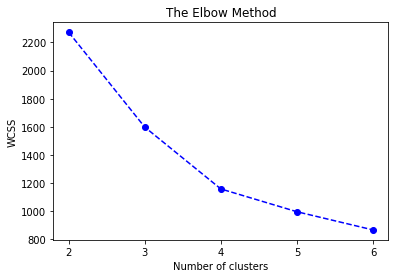

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


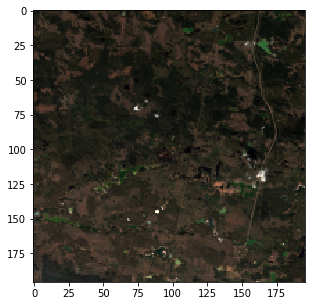

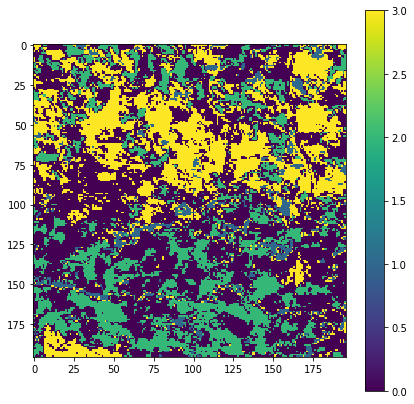

Number of clusters found:  None
Labels:  [3 3 3 ... 2 0 0]
Number of leaves:  38416
Number of connected components:  1
X start reached  196
X end reached  392
Number of rows in the cropped image:  196
Numebr of columns in the cropped image:  196
Number of bands in the cropped image:  12
(38416, 12)


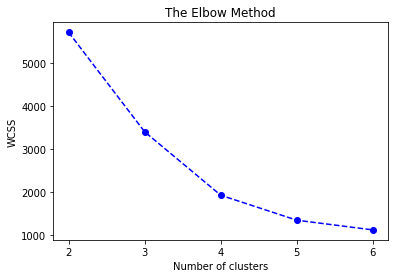

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


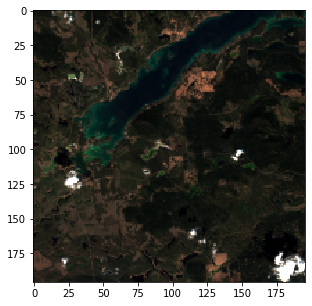

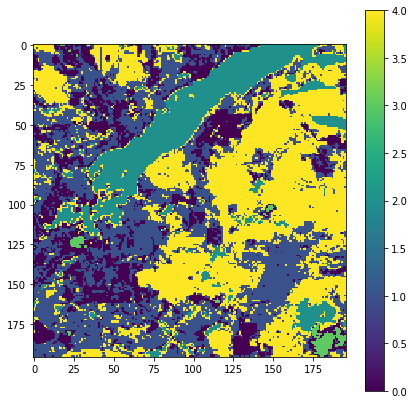

Number of clusters found:  None
Labels:  [4 4 4 ... 1 4 4]
Number of leaves:  38416
Number of connected components:  1
Y star reached  196
Y end reached  392
X start reached  0
X end reached  196
Number of rows in the cropped image:  196
Numebr of columns in the cropped image:  196
Number of bands in the cropped image:  12
(38416, 12)


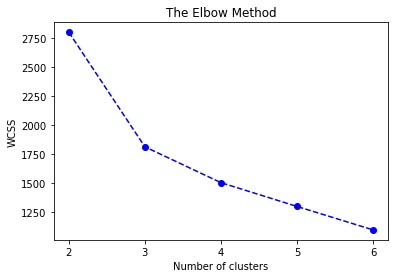

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


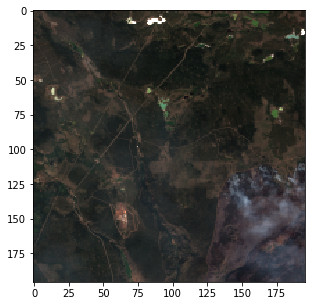

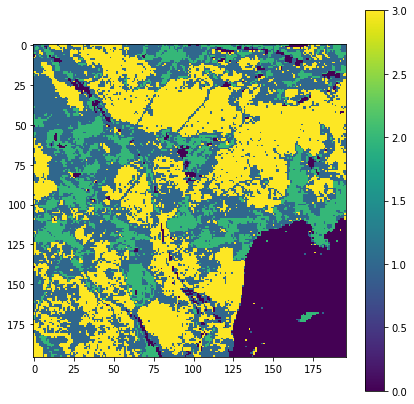

Number of clusters found:  None
Labels:  [1 1 1 ... 0 0 0]
Number of leaves:  38416
Number of connected components:  1
X start reached  196
X end reached  392
Number of rows in the cropped image:  196
Numebr of columns in the cropped image:  196
Number of bands in the cropped image:  12
(38416, 12)


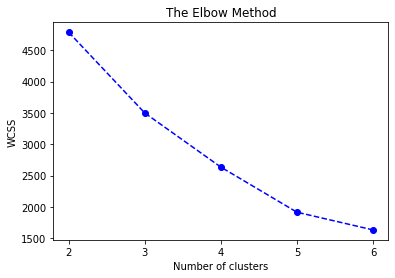

Starting executing the heirarchical clustering
Going to run the heirarchical clustering


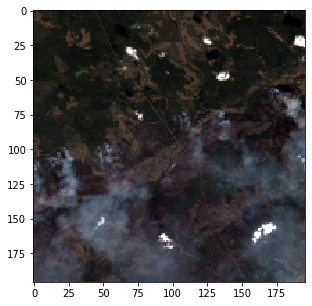

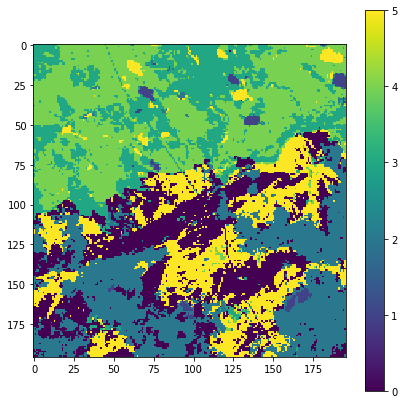

Number of clusters found:  None
Labels:  [3 3 3 ... 0 0 2]
Number of leaves:  38416
Number of connected components:  1
Total number of different clustered cropped images we got:  4
Starting creating the color map
Original Image shape  (1372, 1372)
Final Labels  (196,)


TypeError: ignored

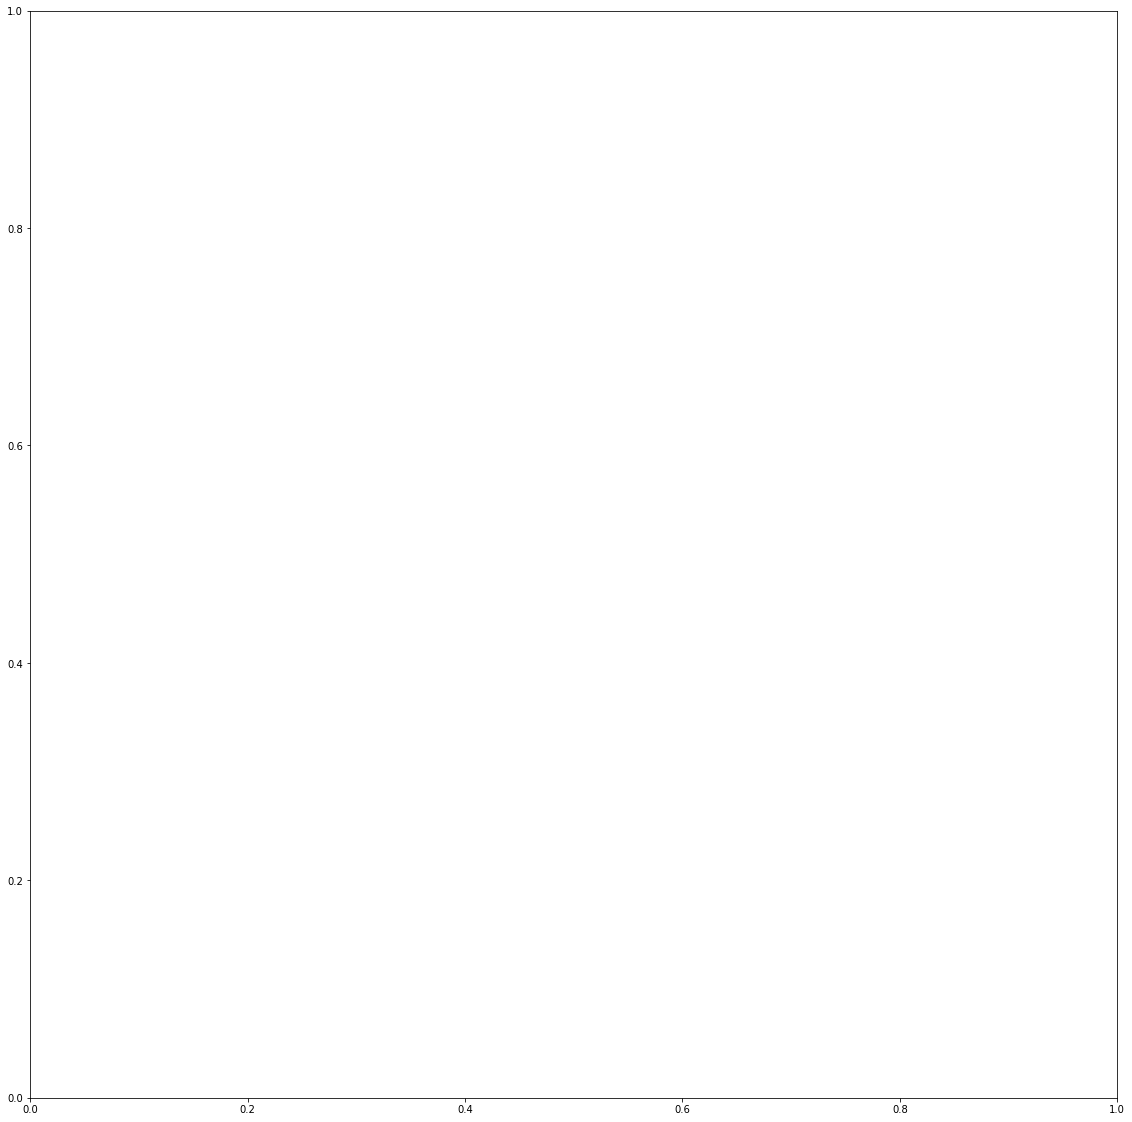

In [0]:
  """
@author: gagandeepbajwa
    based on sattelite-clustering.py by @franama

"""
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.image import grid_to_graph
import cv2

#colab imorts
from google.colab import drive
from google.colab.patches import cv2_imshow # because cv2 doesnot work in colab

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

#defining gloab data
global_data=[]

'''
Function Description: Running heirarchical Clustering on the image

'''
def hierarchical_clustering(image, img, desired_clusters):

    print('Starting executing the heirarchical clustering')
    
      # set parameters for clustering
    n_clusters_desired = desired_clusters # need to experiment with this
    print('Going to run the heirarchical clustering')
    hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold=25.0, linkage='ward') #distance_threshold

    # do the clustering
    hierarchical_clustering.fit(image)

    # extract cluster labels and reshape for plotting
    X_cluster = hierarchical_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(7, 7))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.show()

    # returning the following values: number of clusters, lables, number of trees in the hierarchical tree
    #           number of connected components in the graph
    return hierarchical_clustering.n_clusters, hierarchical_clustering.labels_, hierarchical_clustering.n_leaves_, hierarchical_clustering.n_connected_components_



'''
Function Description: Running the DBSCAN
'''
def dbscan_clustering(image, img):
    
    dbscan_clustering = DBSCAN(eps=0.5, min_samples=10, algorithm= 'ball_tree')

    dbscan_clustering.fit(image)

    X_cluster = dbscan_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(20, 20))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.show()


'''
Function Description: Creating the colormap of the whole image by providing the cropped clustered data
'''    
def create_color_map(data, originalImageData, img, cropped_size):
  
    print('Starting creating the color map')

    #initializing the final_labels
    final_labels=data[0][1][:cropped_size]

    #   for d in range(len(data)-1):
    #     print(type(data[d+1][1]))
    #     print(len(data[d+1][1]))
    #     final_labels =np.concatenate((final_labels,data[d+1][1]))


    #for loop to copy the data appropiately
    csm = 0
    mastern = 0
#     for master in range(7):
#       mastern=0
#       for x in range(cropped_size):

#         for y in range(7):
#           final_labels = np.concatenate((final_labels, data[y+mastern+1][1][csm:csm+cropped_size]))

#           if(y==6):# when y i s6 change the csm to add 196 from each image
#             csm=csm+cropped_size

#         #changing the master number plus 7
        
#         mastern = mastern + 7


    #final_lables = final_labels.reshape(img[:, :, 0].shape)


    #saving the labels, original_cropped images and orginal_image
    global global_data
    global_data.append(img)
    global_data.append(originalImageData)
    global_data.append(final_labels)
    global_data.append(data)

    print('Original Image shape ',img[:, :, 0].shape)
    print('Final Labels ', final_labels.shape)

#     plt.figure(figsize=(20,20))

#     plt.imshow(final_labels)
#     plt.colorbar()
#     plt.show()
  
  




'''
Function Description: Splitting the main image
'''
def image_splitter(image, number):
    
    print('Starting the image splitting')
    #showing the original image
    #img=cv2.imread(image)
    img= image;
    #cv2.imshow('output', img) does not work witj colab
   # cv2_imshow(img)
    #cv2.waitKey(0)

    #Getting the size of the image
    img_height = img.shape[0]
    img_width = img.shape[1]
    
    #Size per cropped image
    cropped_size = int(img.shape[0]/number) # as we have square images, this need to be changed according to the image dimensions
 
    # intitializing the array to store all the required information
    data = [];
    
    #initializing the array that will store numpy array objects of the cropped images
    original_data=[]

    #crop starter
    cs = 0
    cj_cs=0
    cj=0
    for i in range(2):
      
        cj=cj_cs
        cj_cs=cj_cs+cropped_size
        
        print('Y star reached ' ,cj)
        
        print('Y end reached ',cj_cs)
        
        #starting again from the left most
        cs=0
        
        for j in range(2):
          
            print('X start reached ', cs)
            
            print('X end reached ', cs+cropped_size)
          
            #cropping down the image
            crop_img = img[ cj:cj_cs,cs:cs+cropped_size ]

            #informative
            print('Number of rows in the cropped image: ',crop_img.shape[0])
            print('Numebr of columns in the cropped image: ', crop_img.shape[1])
            print('Number of bands in the cropped image: ', crop_img.shape[2])


            #initialize an empty numpy array of cropped image size
            np_crop_img =  np.zeros((crop_img.shape[0],  # number of rows
                            crop_img.shape[1],  # number of cols
                            crop_img.shape[2])  # number of bands
                            )


            #store the image data in the numpy array for reshaping
            for b in range(crop_img.shape[2]):
                np_crop_img[:,:,b] = crop_img[:,:,b]   

            #convert the image to single to numpy array
            new_crop_img_shape = (np_crop_img.shape[0]*np_crop_img.shape[1], np_crop_img.shape[2])
            crop_img_X = np_crop_img[:,:,:np_crop_img.shape[2]].reshape(new_crop_img_shape)
            print(crop_img_X.shape)
                        
            #before running heirarchical clustering find the number of appropriate clusters in the cropped image
            ap_clusters_possible=elbow_method(crop_img_X, 7) #7 is the maximum number of clusters found in the whole image using elbow method

            # showing the cropped image
            #before showing the cropped image we only need 3 bands
            clr_cropped_img = np.zeros((crop_img.shape[0], crop_img.shape[1], 3))
            for b in range(1,4):
              clr_cropped_img[:, :, 3-b] = crop_img[:, :, b]
            
            #display the image
            plt.figure(figsize=(5, 5))
            plt.imshow(clr_cropped_img)
            #cv2_imshow(crop_img)

            #Runninng hierarchical clustering on the cropped image and  receiving the 
            (n_cluster, lables, n_leaves, n_connected_components )=hierarchical_clustering(crop_img_X, crop_img,ap_clusters_possible )

            #pushing the cropped image numpy array to the image_data array
            original_data.append(crop_img)

            #pushing the data to the data array for further interpretation
            data.append((n_cluster, lables, n_leaves, n_connected_components ))

            print('Number of clusters found: ', n_cluster)
            print('Labels: ', lables)
            print('Number of leaves: ', n_leaves)
            print('Number of connected components: ', n_connected_components )



            #increment the crop starter
            cs=cs+cropped_size

            #show the cropped image
            #cv2.imshow("its cropped",crop_img)
            #cv2.waitKey(0)
    

    #printing totla number of clustered cities we get
    print('Total number of different clustered cropped images we got: ', len(data))
    
    #create the color map
    create_color_map(data, original_data, img, cropped_size)




"""
Plots number of clusters vs. within cluster sum of squares
(which we aim to minimize)
"""


def elbow_method(image_2d, max_k):
    wcss = []
    for i in range(2, max_k):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        random_state=42)
        kmeans.fit(image_2d)
        wcss.append(kmeans.inertia_)

    x = [i for i in range(2, max_k)]
    plt.plot(x, wcss, '--bo')
    plt.xticks(x, x)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    #after plotting the elbow find the corner point
    



'''
Function Description: Display an image
'''



'''
Function Description: Main Function
'''

if __name__ == "__main__":
    

    drive.mount('/content/gdrive')
    # parse command line arg
    try:
        #!cp '/content/gdrive/My Drive/2019-10-2-111855.png' image
        image = '/content/gdrive/My Drive/sentinel2.bin'   #trying it with the 12 band original image

    # catch no file given
    except IndexError:
        print("Must provide a filename")
        sys.exit(0)

    #with the same image create multiple images
    


    # Read in raster image
    img_ds = gdal.Open(image, gdal.GA_ReadOnly)



    # allocate memory to reshape image
    img = np.zeros((img_ds.RasterYSize,  # number of rows
                    img_ds.RasterXSize,  # number of cols
                    img_ds.RasterCount),  # number of bands
                    gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code

    # reshape the image band by band
    for b in range(img.shape[2]):
        print("reading band", b + 1, "of", img.shape[2])
        print('Band Type: ', img_ds.GetRasterBand(b+1).DataType)
        img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

    #Printing the shape of the image
    print(img.shape[0]*img.shape[1])
    print('Image Raster Count: ', img.shape[2])


    #Downsampling the image before reshaping
   #img = img[::2, ::2] + img[1::2, ::2] + img[::2, 1::2] + img[1::2, 1::2]

    # reshape image again to match expected format for scikit-learn
    new_shape = (img.shape[0] * img.shape[1], img.shape[2])
    X = img[:, :, :img.shape[2]].reshape(new_shape)
    print (X.shape[0])

    
    new_img = img[0:392,0:392]
    #running the hierarchical clustering
    #hierarchical_clustering(X, img, 7)

    #runnig the DBSCAN
    #dbscan_clustering(X, img)

    #running image splitting
    #image_splitter(image, 7)
    image_splitter(img,7)



Ways to compare the clsuters

-- take centroid of clusters
-- random sampling


Important to note here is that cv2.imshow() is disabled in Colab, because it causes Jupyter sessions. So as the substitution consider user 'from google.colab.patches import cv2_imshow'

data length:  4
Cropped_Images shape:    (196, 196, 12)
[[  0   5]
 [  0   9]
 [  0  10]
 ...
 [195 187]
 [195 194]
 [195 195]]
cluster_vlaue we got:  (19282, 12)
[[  0  27]
 [  0  28]
 [  0  29]
 ...
 [195 171]
 [195 172]
 [195 173]]
cluster_vlaue we got:  (1792, 12)
[[  0   6]
 [  0   7]
 [  0   8]
 ...
 [195 191]
 [195 192]
 [195 193]]
cluster_vlaue we got:  (8223, 12)
[[  0   0]
 [  0   1]
 [  0   2]
 ...
 [195 179]
 [195 180]
 [195 184]]
cluster_vlaue we got:  (9119, 12)
[[  0  13]
 [  0  14]
 [  0  16]
 ...
 [195 182]
 [195 183]
 [195 184]]
cluster_vlaue we got:  (6358, 12)
[[  0  15]
 [  0  22]
 [  0  25]
 ...
 [195 186]
 [195 192]
 [195 193]]
cluster_vlaue we got:  (12970, 12)
[[  0  54]
 [  0 142]
 [  0 143]
 ...
 [195  76]
 [195  77]
 [195  78]]
cluster_vlaue we got:  (5224, 12)
[[  0  17]
 [  0  18]
 [  0  19]
 [  3  23]
 [  4  22]
 [  4  23]
 [  6  27]
 [  7  27]
 [ 31  60]
 [ 33  61]
 [ 34  61]
 [ 49  30]
 [101 147]
 [101 148]
 [101 149]
 [102 147]
 [102 148]
 [102 149]
 [

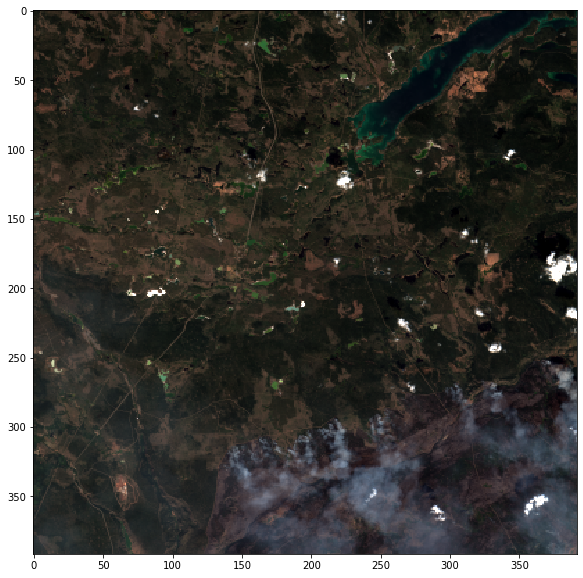

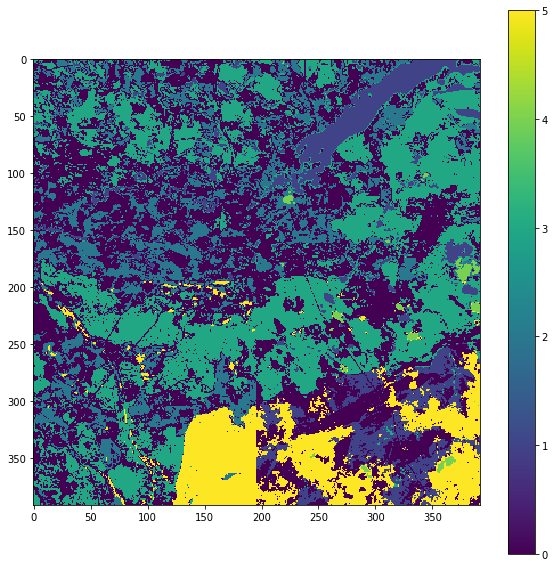

In [0]:
#array to store all the cluster objects
clusters =[]

#show the final colored image
image = global_data[0]

cropped_images = global_data[1]

final_labels_ = global_data[2]

data = global_data[3]


final_labels = [] #List containing the final 


print("data length: ", len(data))



print('Cropped_Images shape:   ', cropped_images[0].shape)



cluster_nos =[]
indexes_for_clusters=[]
labels_in_cropped =[] #storing labels in the cropped image shape, so it will be easy to join them at the end

#comparing the cluster objects and deciding whether two cluster objects need to be considered one or not
for r in range(len(data)): # go through all the elements stored in the data object
  labels = data[r][1] # getting labels for individual cropped images
  #reshaping the labels into the cropped image shape
  labels_cr = labels.reshape(cropped_images[0][ :, :, 0].shape)
  #labels_cr = labels #just here for testing
  labels_in_cropped.append(labels_cr)
  cluster_nos.append(max(labels)) # appending the maximum number in labels means number of clusters in that cropped_image
  for k in range(max(labels)+1): # go through each of the cluster
    np_labels = np.array(labels_cr)
    indexes_f = np.where(np_labels==k) # get all the indexes of the occurrence of specific element in the numpy array
    i_cluster_values_ = []
    indexes = np.array((indexes_f[0], indexes_f[1])).T
    print(indexes)
    
    for ind in range(len(indexes)):
      i_cluster_values_.append(cropped_images[r][indexes[ind][0], indexes[ind][1]])
   # i_cluster_values=cropped_images[r][indexes] # get all the values at the specific indexes
    #i_cluster_values = np.take(cropped_images[r], indexes)
    i_cluster_values = np.array(i_cluster_values_) #.reshape(cropped_images[0].shape[0]*cropped_images[0].shape[1], cropped_images[0].shape[2])
    print('cluster_vlaue we got: ', i_cluster_values.shape)
    clusters.append([i_cluster_values, 0]) # append all the cluster objects to the clusters list
    indexes_for_clusters.append([indexes, r, k]) # appending all the clusters's index and indexes of all the objects in that cluster we got from running heirarchical clustering on a cropped image
  
  

#printing total number of cluster objects we found
print("Total Number of clusters found: ",len(clusters))
print("Maximum number of clusters found in the cropped images: ", max(cluster_nos))
print(len(clusters[0][0]))

#labels numbers user
lnu = []

#compared
comparedp = 0

magic_number = []

for i in range(len(clusters)):
  magic_number.append(i)
  



#starting comparing the clusters
for a in range(len(clusters)):
  comparedp = 0 # re-initilaizae it toi zero for each cluster a 
  for b in range(a,len(clusters)):
    if(a!=b and clusters[a][1] != 1 and clusters[b][1]!=1): # processed with the comparison only if both clusters are different
      cluster_a = clusters[a][0]
      cluster_b = clusters[b][0]
      a_b = np.concatenate((cluster_a, cluster_b))
      #now run the heirarchical clustering
      hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold=27.0, linkage='ward')  #distance threshold has been changed from 25 to 30, need to experiment with it

      # do the clustering
      hierarchical_clustering.fit(a_b)
             
      # extract cluster labels and reshape for plotting
      cluster = hierarchical_clustering.labels_
      #printing total number of clusters found
      #print(max(cluster))
      if(max(cluster)>=1):
        print('Move on, they are different clusters', a, 'and ', b)
        
        #update the label numbers, because their label number may be acquired by some other clusters while merging, do this only when your cluster is unique
        if(b==magic_number[len(magic_number)-1] and comparedp==0):
            print('Cluster Number: ',a,' came out to be a lonely cluster')
          
            cropped_imgan = indexes_for_clusters[a][1]
            indexes_vtca = indexes_for_clusters[a][0]
            values1=[]
            for values in indexes_vtca:
              if(len(lnu)==0):
                values1.append(0)
             
              else:
                values1.append(lnu[len(lnu)-1]+1)
            
            indlablesa = indexes_vtca
            for inla in range(len(indexes_vtca)):
              labels_in_cropped[cropped_imgan][indlablesa[inla][0], indlablesa[inla][1]] = values1[inla]
            
            
            lnu.append(lnu[len(lnu)-1]+1) # this label number is already used
            print(lnu)
          
         
        
      else:
          #increment the compared positive
          comparedp+=1
          magic_number.remove(b) #add removed clusters to the magic_number list
          print('Magic Numeber: ', magic_number) #informative print
          clusters[b][1]= 1 #mark the cluster as done because we dont need to compare it with other clusters again
          print('Something is here to think about')
          indexes_vtca = indexes_for_clusters[a][0] # indexes where values need to be changed
          cropped_imgan = indexes_for_clusters[a][1]

          indexes_vtcb = indexes_for_clusters[b][0] # indexes where values need to be changed
          cropped_imgbn = indexes_for_clusters[b][1]
    
          
          values2a=[]
          for values in indexes_vtca:
             if(len(lnu)==0):
              values2a.append(0)
             
             else:
                if(comparedp>1):
                  values2a.append(lnu[len(lnu)-1])
                
                else:
                  values2a.append(lnu[len(lnu)-1]+1)
             
          
          values2b=[]
          for values in indexes_vtcb:
            if(len(lnu)==0):
              values2b.append(0)
            
            else:
              if(comparedp>1):
                values2b.append(lnu[len(lnu)-1])
              
              else:
                values2b.append(lnu[len(lnu)-1]+1)
          
          indlablesa = indexes_vtca
          indlablesb = indexes_vtcb
          for inla in range(len(indexes_vtca)):
            labels_in_cropped[cropped_imgan][indlablesa[inla][0], indlablesa[inla][1]] = values2a[inla]
          
          for inlb in range(len(indexes_vtcb)):
            labels_in_cropped[cropped_imgbn][indlablesb[inlb][0], indlablesb[inlb][1]] = values2b[inlb]
 
          if(comparedp==1):
            lnu.append(values2a[0]) # this label number is already used
          
          print(lnu)
         
        
        
      
      
#       plt.figure(figsize=(7, 7))
#       #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
#       # Create the colormap
#       #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
#       plt.imshow(X_cluster) #, cmap=cm)
#       plt.colorbar()
#       plt.show()
            

#join the cropped labels
print('------------------------\nStarting Joining the Cropped Images\n----------------- ')
#cropped Size
cropped_size = 196

csm = 0
mastern = 0

print('labels_in_cropped size: ', len(labels_in_cropped))


print('Number of clusters found in the result image: ', len(lnu))


for master in range(2):
#     print('Mastern Value is: ', mastern)
    #after the new row is started initialize csm back to 0
    csm=0
    for x in range(cropped_size):
#         print('x is: ', x)       
        for y in range(2):
#           print('csm value is: ', csm)
#           print("csm plus cropped size: ", csm + cropped_size)   
            #showing the cropped image with the new labels
#           plt.figure(figsize=(5,5))
#           plt.imshow(labels_in_cropped[y+mastern].reshape(196,196))
      
          #doing the appending operations
          data_= labels_in_cropped[y+mastern].reshape(cropped_size*cropped_size)  
          final_labels = np.concatenate((final_labels, data_[csm:csm+cropped_size]))
          #size of the final labels
#           print(final_labels.shape)
          
          if(y==1):# when y i s6 change the csm to add 196 from each image
            csm=csm+cropped_size
        
        if(x==195):
          #changing the master number plus 7     
          mastern = mastern + 2  
  
  
  
  
print(image.shape)
print(final_labels.shape)  
  
#reshaping the final labels
rfl = final_labels.reshape(392,392)

print(rfl.shape)  
  
print('Number of clusters found in the final image', max(final_labels)+1)

# allocate memory to reshape image
img_colored = np.zeros((392,  # number of rows
                392,  # number of cols
                3),  # number of bands
                gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code
  

for b in range(1,4):
  img_colored[:, :, 3-b] = img[0:392, 0:392, b]
  
plt.figure(figsize=(10, 10))
plt.imshow(img_colored) #show the colored image for the testing image of size 392, 392

# cropped_image = plt.savefig('cropped_image.png')
# drive.download('cropped_image.png')
  
#shwing the final image
plt.figure(figsize=(10, 10))
plt.imshow(rfl)
plt.colorbar()
plt.show()

# cropped_colormap = plt.savefig('cropped_colormap.png')

# drive.download('cropped_colormap.png')






# New Section

# New Section

Meeting Date: 24 October, 2019

confusion matrix, compare the labeled with the true

Instead of taking all the data, do random sampling over that data.......




**Pseudo Code For Comparing the Cluster Objects which we got from the Heirarchical CLustering of each cropped image**

clusters - cluster objects in list(contains data points that makes that cluster)
indexes - index objects in list (contains all the indexes from where each data came from in the cropped image)

```
# Algorithm to compare the clusters
for each cluster in cluster:
  compare cluster with other cluster object:
    take all the data points from one cluster and from another cluster
    concatenate data points in combined_data_points
    
    result = aggolomerative_clustering(combined_data_points)
    labels = result.labels ## get labels for each data points provided Eg: [1,0,0,0.....4,5]
    total_clusters_found = maximum(labels)
    
    if total_clusters_found equal to 0:
      ##they are one cluster
      give the label to all the indexes with data points in second cluster to that of first cluster
    
    
    else:
      ##they are different cluster, so if the datapoints was in same cropped image they woul be in different cluster
      
```


  
  




In [0]:
  """
@author: gagandeepbajwa
    based on sattelite-clustering.py by @franama

"""
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal, gdal_array
from matplotlib.colors import LinearSegmentedColormap
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.feature_extraction.image import grid_to_graph
import cv2

#colab imorts
from google.colab import drive
from google.colab.patches import cv2_imshow # because cv2 doesnot work in colab

# Tell GDAL to throw Python exceptions, and register all drivers
gdal.UseExceptions()
gdal.AllRegister()

#defining gloab data
global_data=[]

'''
Function Description: Running heirarchical Clustering on the image

'''
def hierarchical_clustering(image, img, desired_clusters):

    print('Starting executing the heirarchical clustering')
    
      # set parameters for clustering
    n_clusters_desired = desired_clusters # need to experiment with this
    print('Going to run the heirarchical clustering')
    hierarchical_clustering = AgglomerativeClustering(n_clusters = None, distance_threshold=25.0, linkage='ward') #distance_thrshold

    # do the clustering
    hierarchical_clustering.fit(image)

    # extract cluster labels and reshape for plotting
    X_cluster = hierarchical_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(7, 7))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.show()

    # returning the following values: number of clusters, lables, number of trees in the hierarchical tree
    #           number of connected components in the graph
    return hierarchical_clustering.n_clusters, hierarchical_clustering.labels_, hierarchical_clustering.n_leaves_, hierarchical_clustering.n_connected_components_



'''
Function Description: Running the DBSCAN
'''
def dbscan_clustering(image, img):
    
    dbscan_clustering = DBSCAN(eps=0.5, min_samples=10, algorithm= 'ball_tree')

    dbscan_clustering.fit(image)

    X_cluster = dbscan_clustering.labels_
    X_cluster = X_cluster.reshape(img[:, :, 0].shape)

    plt.figure(figsize=(20, 20))
    #colors = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 0, 1), (1, 1, 0), (0, 1, 1), (0.1, 0.2, 0.5), (0.8, 0.1, 0.3)]
    # Create the colormap
    #cm = LinearSegmentedColormap.from_list("my map", colors, N=10)
    plt.imshow(X_cluster) #, cmap=cm)
    plt.colorbar()
    plt.savefig('sentinel2_dbscan.png') #saving the dbscan image
    plt.show()


'''
Function Description: Creating the colormap of the whole image by providing the cropped clustered data
'''    
def create_color_map(data, originalImageData, img, cropped_size):
  
    print('Starting creating the color map')

    #initializing the final_labels
    final_labels=data[0][1][:cropped_size]

    #   for d in range(len(data)-1):
    #     print(type(data[d+1][1]))
    #     print(len(data[d+1][1]))
    #     final_labels =np.concatenate((final_labels,data[d+1][1]))


    #for loop to copy the data appropiately
    csm = 0
    mastern = 0
#     for master in range(7):
#       mastern=0
#       for x in range(cropped_size):

#         for y in range(7):
#           final_labels = np.concatenate((final_labels, data[y+mastern+1][1][csm:csm+cropped_size]))

#           if(y==6):# when y i s6 change the csm to add 196 from each image
#             csm=csm+cropped_size

#         #changing the master number plus 7
        
#         mastern = mastern + 7


    #final_lables = final_labels.reshape(img[:, :, 0].shape)


    #saving the labels, original_cropped images and orginal_image
    global global_data
    global_data.append(img)
    global_data.append(originalImageData)
    global_data.append(final_labels)
    global_data.append(data)

    print('Original Image shape ',img[:, :, 0].shape)
    print('Final Labels ', final_labels.shape)

    plt.figure(figsize=(20,20))

    plt.imshow(final_labels)
    plt.colorbar()
    plt.show()
  
  




'''
Function Description: Splitting the main image
'''
def image_splitter(image, number):
    
    print('Starting the image splitting')
    #showing the original image
    #img=cv2.imread(image)
    img= image;
    #cv2.imshow('output', img) does not work witj colab
   # cv2_imshow(img)
    #cv2.waitKey(0)

    #Getting the size of the image
    img_height = img.shape[0]
    img_width = img.shape[1]
    
    #Size per cropped image
    cropped_size = int(img.shape[0]/number) # as we have square images, this need to be changed according to the image dimensions
 
    # intitializing the array to store all the required information
    data = [];
    
    #initializing the array that will store numpy array objects of the cropped images
    original_data=[]

    #crop starter
    cs = 0
    cj_cs=0
    cj=0
    for i in range(number):
      
        cj=cj_cs
        cj_cs=cj_cs+cropped_size
        
        print('Y star reached ' ,cj)
        
        print('Y end reached ',cj_cs)
        
        #starting again from the left most
        cs=0
        
        for j in range(number):
          
            print('X start reached ', cs)
            
            print('X end reached ', cs+cropped_size)
          
            #cropping down the image
            crop_img = img[cs:cs+cropped_size, cj:cj_cs]

            #informative
            print('Number of rows in the cropped image: ',crop_img.shape[0])
            print('Numebr of columns in the cropped image: ', crop_img.shape[1])
            print('Number of bands in the cropped image: ', crop_img.shape[2])


            #initialize an empty numpy array of cropped image size
            np_crop_img =  np.zeros((crop_img.shape[0],  # number of rows
                            crop_img.shape[1],  # number of cols
                            crop_img.shape[2])  # number of bands
                            )


            #store the image data in the numpy array for reshaping
            for b in range(crop_img.shape[2]):
                np_crop_img[:,:,b] = crop_img[:,:,b]   

            #convert the image to single to numpy array
            new_crop_img_shape = (np_crop_img.shape[0]*np_crop_img.shape[1], np_crop_img.shape[2])
            crop_img_X = np_crop_img[:,:,:np_crop_img.shape[2]].reshape(new_crop_img_shape)
            print(crop_img_X.shape)
                        
            #before running heirarchical clustering find the number of appropriate clusters in the cropped image
            ap_clusters_possible=elbow_method(crop_img_X, 7) #7 is the maximum number of clusters found in the whole image using elbow method

            # showing the cropped image
            #before showing the cropped image we only need 3 bands
            clr_cropped_img = np.zeros((crop_img.shape[0], crop_img.shape[1], 3))
            for b in range(0,3):
              clr_cropped_img[:, :, 2-b] = crop_img[:, :, b]
            
            #display the image
            plt.figure(figsize=(5, 5))
            plt.imshow(clr_cropped_img)
            #cv2_imshow(crop_img)

            #Runninng hierarchical clustering on the cropped image and  receiving the 
            (n_cluster, lables, n_leaves, n_connected_components )=hierarchical_clustering(crop_img_X, crop_img,ap_clusters_possible )

            #pushing the cropped image numpy array to the image_data array
            original_data.append(crop_img)

            #pushing the data to the data array for further interpretation
            data.append((n_cluster, lables, n_leaves, n_connected_components ))

            print('Number of clusters found: ', n_cluster)
            print('Labels: ', lables)
            print('Number of leaves: ', n_leaves)
            print('Number of connected components: ', n_connected_components )



            #increment the crop starter
            cs=cs+cropped_size

            #show the cropped image
            #cv2.imshow("its cropped",crop_img)
            #cv2.waitKey(0)
    

    #printing totla number of clustered cities we get
    print('Total number of different clustered cropped images we got: ', len(data))
    
    #create the color map
    create_color_map(data, original_data, img, cropped_size)




"""
Plots number of clusters vs. within cluster sum of squares
(which we aim to minimize)
"""


def elbow_method(image_2d, max_k):
    wcss = []
    for i in range(2, max_k):
        kmeans = KMeans(n_clusters=i, init='k-means++',
                        random_state=42)
        kmeans.fit(image_2d)
        wcss.append(kmeans.inertia_)

    x = [i for i in range(2, max_k)]
    plt.plot(x, wcss, '--bo')
    plt.xticks(x, x)
    plt.title('The Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()
    
    #after plotting the elbow find the corner point
    



'''
Function Description: Display an image
'''



'''
Function Description: Main Function
'''

if __name__ == "__main__":
    

    drive.mount('/content/gdrive')
    # parse command line arg
    try:
        #!cp '/content/gdrive/My Drive/2019-10-2-111855.png' image
        image = '/content/gdrive/My Drive/sentinel2.bin'   #trying it with the 12 band original image

    # catch no file given
    except IndexError:
        print("Must provide a filename")
        sys.exit(0)

    #with the same image create multiple images
    


    # Read in raster image
    img_ds = gdal.Open(image, gdal.GA_ReadOnly)



    # allocate memory to reshape image
    img = np.zeros((img_ds.RasterYSize,  # number of rows
                    img_ds.RasterXSize,  # number of cols
                    img_ds.RasterCount),  # number of bands
                    gdal_array.GDALTypeCodeToNumericTypeCode(img_ds.GetRasterBand(1).DataType)) # data type code

    # reshape the image band by band
    for b in range(img.shape[2]):
        print("reading band", b + 1, "of", img.shape[2])
        print('Band Type: ', img_ds.GetRasterBand(b+1).DataType)
        img[:, :, b] = img_ds.GetRasterBand(b + 1).ReadAsArray()

    #Printing the shape of the image
    print(img.shape[0]*img.shape[1])
    print('Image Raster Count: ', img.shape[2])


    #Downsampling the image before reshaping
   #img = img[::2, ::2] + img[1::2, ::2] + img[::2, 1::2] + img[1::2, 1::2]

    # reshape image again to match expected format for scikit-learn
    new_shape = (img.shape[0] * img.shape[1], img.shape[2])
    X = img[:, :, :img.shape[2]].reshape(new_shape)
    print (X.shape[0])

    #running the hierarchical clustering
    #hierarchical_clustering(X, img, 7)

    #runnig the DBSCAN
    dbscan_clustering(X, img)

    #running image splitting
    #image_splitter(image, 7)
    #image_splitter(img,7)



Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
reading band 1 of 12
Band Type:  6
reading band 2 of 12
Band Type:  6
reading band 3 of 12
Band Type:  6
reading band 4 of 12
Band Type:  6
reading band 5 of 12
Band Type:  6
reading band 6 of 12
Band Type:  6
reading band 7 of 12
Band Type:  6
reading band 8 of 12
Band Type:  6
reading band 9 of 12
Band Type:  6
reading band 10 of 12
Band Type:  6
reading band 11 of 12
Band Type:  6
reading band 12 of 12
Band Type:  6
1882384
Image Raster Count:  12
1882384
